In [1]:
from deepface import DeepFace 
import cv2
from matplotlib import pyplot as plt
import random as rd
import os

import firebase_admin
from firebase_admin import credentials as crd
from firebase_admin import storage, db

from google.cloud import storage as strg
from google.oauth2 import service_account
import datetime

In [2]:
model_name = 'VGG-Face'


In [20]:
credentials = service_account.Credentials.from_service_account_file('serviceAccountKey.json')
client = strg.Client(credentials=credentials, project='face-atendance')

In [21]:
cred = crd.Certificate("serviceAccountKey.json")

In [22]:
firebase_admin.initialize_app(cred, {
    'storageBucket': 'face-atendance.appspot.com',
    "databaseURL": "https://face-atendance-default-rtdb.europe-west1.firebasedatabase.app/"
}, name='strga')

In [8]:
bucket = client.get_bucket('face-atendance.appspot.com')

blobs = bucket.list_blobs()

for blob in blobs:
    filename = os.path.join('deleted', blob.name.split('/')[-1])
    if os.path.exists('deleted/' + filename):
        pass
    else:
        blob.download_to_filename(filename)
    print(blob)

<Blob: face-atendance.appspot.com, 19B030068.png, 1682605308535634>
<Blob: face-atendance.appspot.com, 19B030222.png, 1682605309670804>
<Blob: face-atendance.appspot.com, 19B030291.png, 1682605309555464>


In [37]:
img_path1 = 'images/tom.jpg'

In [34]:
# if os.path.exists('representations_vgg_face.pkl') == True:
#   os.remove('deleted/representations_vgg_face.pkl')
res = DeepFace.find(img_path1, db_path='deleted', model_name=model_name)

There are  3  representations found in  representations_vgg_face.pkl
find function lasts  0.6020987033843994  seconds


In [39]:
ver = DeepFace.verify(img_path1, "deleted/19B030222.png", model_name=model_name)
print(ver)

{'verified': False, 'distance': 0.6587334589741429, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 90, 'y': 386, 'w': 449, 'h': 449}, 'img2': {'x': 164, 'y': 284, 'w': 616, 'h': 616}}, 'time': 1.25}


In [29]:
extracted = DeepFace.extract_faces(img_path1)

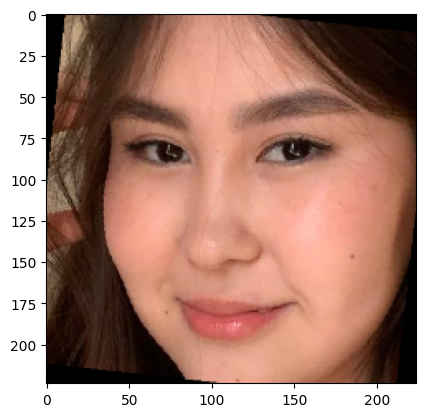

In [30]:
plt.imshow(extracted[0]['face'])

In [35]:
res

[                                            identity  source_x  source_y  \
 0  C:\Users\akhme\Desktop\diploma\deleted/19B0302...       193       376   
 
    source_w  source_h  VGG-Face_cosine  
 0       420       420         0.301936  ]

In [18]:
try:
  res[0].iloc[0]['identity']
except:
  print("Empty data frame")

In [36]:
filename = res[0].iloc[0]['identity']
img_id = filename.split("/")[1].split(".")[0]
print(img_id)

19B030222


In [11]:
ref = db.reference('persons')

data = ref.child(img_id).get()

print(data['firstname'])

ValueError: The default Firebase app does not exist. Make sure to initialize the SDK by calling initialize_app().